<a href="https://colab.research.google.com/github/kawamara1/AlgoTrading/blob/main/B351Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
!pip install pandas_ta
import pandas_ta as ta
data = yf.download(tickers = '^GSPC', start = '2009-01-01', end = '2019-09-01')
data.head(10)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... canceled
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/r

ModuleNotFoundError: ignored

In [ ]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data["Open-Close"] = data["Open"] - data["Close"]
data['Target'] = data['Adj Close'] - data.Open
data['Target'] = data['Target'].shift(-1)
data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)
data['TargetPreviousClose'] = data['Adj Close'].shift(1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [ ]:
data_set = data.iloc[:, 0:13]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Open-Close,Target,TargetClass,TargetNextClose,TargetPreviousClose
0,1004.059998,1008.000000,992.489990,997.080017,69.013240,968.726568,901.854873,867.317733,6.979980,10.649963,1,1010.479980,1002.719971
1,999.830017,1018.000000,999.830017,1010.479980,72.506663,972.703083,904.005865,869.213921,-10.649963,-1.790039,0,1007.099976,997.080017
2,1008.890015,1010.119995,1000.989990,1007.099976,70.362809,975.978978,906.047332,871.040227,1.790039,-11.420044,0,994.349976,1010.479980
3,1005.770020,1005.770020,992.400024,994.349976,62.851914,977.728596,907.795900,872.673469,11.420044,11.809998,1,1005.809998,1007.099976
4,994.000000,1012.780029,993.359985,1005.809998,66.314713,980.403016,909.736773,874.436866,-11.809998,6.869995,1,1012.729980,994.349976
5,1005.859985,1013.140015,1000.820007,1012.729980,68.230653,983.481774,911.776242,876.268563,-6.869995,-8.139954,0,1004.090027,1005.809998
6,1012.229980,1012.599976,994.599976,1004.090027,63.406252,985.444465,913.604238,877.961563,8.139954,-18.450012,0,979.729980,1012.729980
7,998.179993,998.179993,978.510010,979.729980,52.246576,984.900228,914.913659,879.309489,18.450012,9.049988,1,989.669983,1004.090027
8,980.619995,991.200012,980.619995,989.669983,55.658515,985.354491,916.393982,880.771217,-9.049988,9.580017,1,996.460022,979.729980
9,986.880005,999.609985,980.619995,996.460022,57.862047,986.412160,917.979448,882.303519,-9.580017,10.960022,1,1007.369995,989.669983


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.01146855 0.00824831 0.0068671  ... 1.         0.01502837 0.01123584]
 [0.00939894 0.01315802 0.0104726  ... 0.         0.01337647 0.00847944]
 [0.01383175 0.00928916 0.01104239 ... 0.         0.00714519 0.01502837]
 ...
 [0.93574378 0.93657148 0.92449616 ... 1.         0.93259463 0.92792236]
 [0.92015562 0.93227057 0.92079242 ... 1.         0.95050167 0.92341631]
 [0.94417406 0.95214015 0.94663982 ... 0.         0.95142042 0.93259463]]


In [ ]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-3])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2534
[[[1.14685533e-02 8.24830765e-03 6.86710329e-03 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [9.39893936e-03 1.31580182e-02 1.04725963e-02 ... 1.96634551e-03
   1.07733648e-03 9.46406253e-04]
  [1.38317488e-02 9.28916388e-03 1.10423865e-02 ... 3.58624124e-03
   2.09981690e-03 1.85793304e-03]
  ...
  [3.34711623e-02 3.18345761e-02 3.18844443e-02 ... 2.67662041e-02
   2.44544691e-02 2.27678273e-02]
  [3.58979358e-02 3.80797135e-02 3.65263529e-02 ... 2.89280414e-02
   2.56255760e-02 2.37979462e-02]
  [4.26890432e-02 4.10304543e-02 4.06181089e-02 ... 3.07299903e-02
   2.67410609e-02 2.47928039e-02]]

 [[9.39893936e-03 1.31580182e-02 1.04725963e-02 ... 1.96634551e-03
   1.07733648e-03 9.46406253e-04]
  [1.38317488e-02 9.28916388e-03 1.10423865e-02 ... 3.58624124e-03
   2.09981690e-03 1.85793304e-03]
  [1.23052204e-02 7.15345180e-03 6.82291120e-03 ... 4.45140954e-03
   2.97559654e-03 2.67309988e-03]
  ...
  [3.58979358e-02 3.80797135e-02 3.65263529e-02 ... 2.89280414e-02
   2.

In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2003
(2003, 30, 8)
(501, 30, 8)
(2003, 1)
(501, 1)
[[0.]
 [1.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(5, name='dense_layer')(inputs)
inputs = Dense(5, name='dense_layer1')(inputs)
inputs = Dense(5, name='dense_layer2')(inputs)
inputs = Dense(1, name='dense_layer3')(inputs)
output = Activation('tanh', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse', metrics = ["accuracy"])
model.fit(x=X_train, y=y_train, batch_size=30, verbose = 1, epochs=10, shuffle=True, validation_split = 0.1)

Epoch 1/10
61/61 [==============================] - 16s 138ms/step - loss: 0.2694 - accuracy: 0.5211 - val_loss: 0.2620 - val_accuracy: 0.5174
Epoch 2/10
61/61 [==============================] - 8s 124ms/step - loss: 0.2532 - accuracy: 0.5189 - val_loss: 0.2515 - val_accuracy: 0.5025
Epoch 3/10
61/61 [==============================] - 8s 125ms/step - loss: 0.2519 - accuracy: 0.5166 - val_loss: 0.2503 - val_accuracy: 0.4925
Epoch 4/10
61/61 [==============================] - 7s 111ms/step - loss: 0.2518 - accuracy: 0.5017 - val_loss: 0.2579 - val_accuracy: 0.5174
Epoch 5/10
61/61 [==============================] - 3s 51ms/step - loss: 0.2523 - accuracy: 0.5089 - val_loss: 0.2502 - val_accuracy: 0.5174
Epoch 6/10
61/61 [==============================] - 5s 78ms/step - loss: 0.2506 - accuracy: 0.5261 - val_loss: 0.2501 - val_accuracy: 0.5174
Epoch 7/10
61/61 [==============================] - 3s 52ms/step - loss: 0.2503 - accuracy: 0.5289 - val_loss: 0.2529 - val_accuracy: 0.4826
Epoch 8/

In [ ]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

16/16 [==============================] - 1s 18ms/step
[0.4835709] [0.]
[0.48204964] [1.]
[0.4827106] [0.]
[0.48235428] [0.]
[0.48225057] [1.]
[0.48249233] [1.]
[0.48085847] [1.]
[0.47934338] [1.]
[0.4783051] [1.]
[0.4778189] [1.]


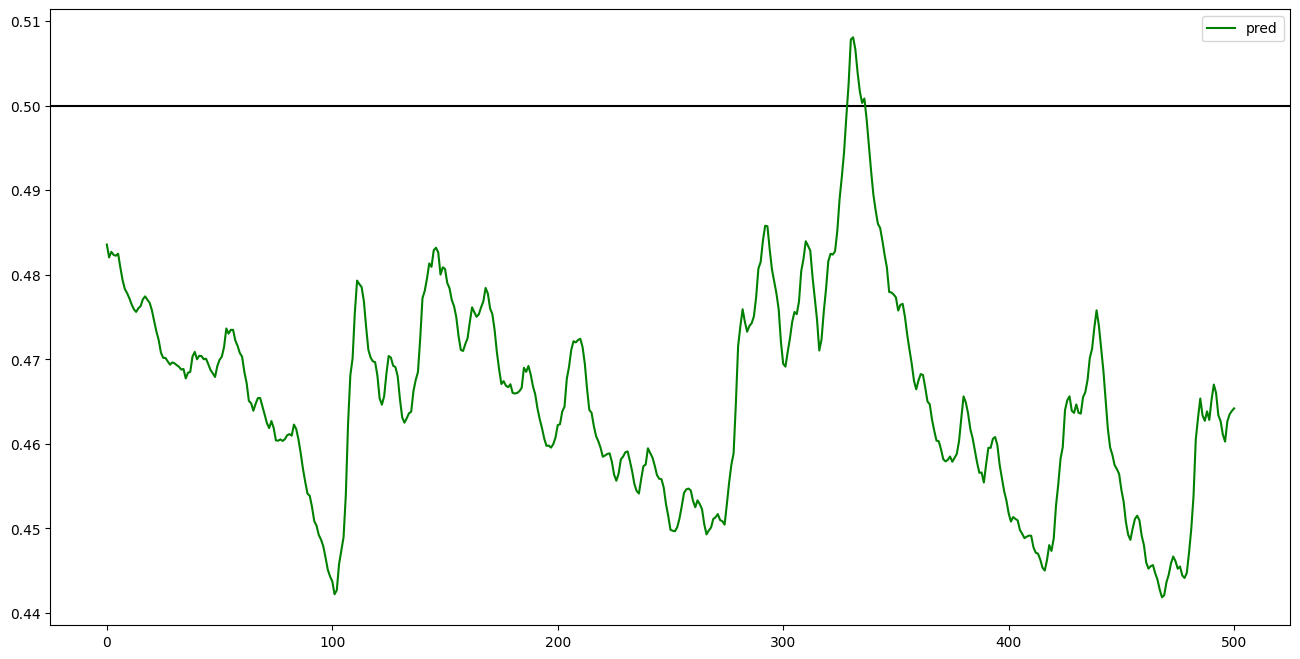

16/16 [==============================] - 0s 21ms/step - loss: 0.2541 - accuracy: 0.4531
0.45309382677078247


In [ ]:
plt.figure(figsize=(16,8))
plt.axhline(0.5, color = "black", linestyle = "-")
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

loss, accuracy = model.evaluate (X_test, y_test)

print(accuracy)
